# Running the QRF Model 


    The model is based off the paper Srikumar et al., "A kernel-based quantum random forest for improved classification", (2022). The code is intended for research purposes and the development of proof of concepts. For questions about the code, please email maiyuren.s@gmail.com for clarification.

In [1]:
from quantum_random_forest import QuantumRandomForest, set_multiprocessing
from split_function import SplitCriterion
from data_construction import data_preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics, datasets

## Load dataset

Here you can load your own dataset. The preprocessing can be left untouched. However, it is important to note that certain embeddings require data of certain dimension. PCA reduction to the required dimension can be achieved by changing the X_dim variable. 

In [2]:
data = datasets.load_breast_cancer()
num_classes = 2
X, y = data.data, data.target

### Data pre-processing

In [3]:
training_set, testing_set = data_preprocessing(X, y, 
                                               train_prop=0.75,        # Proportion of dataset allocated for training
                                               X_dim=6)                # Determine the required dimension of the dataset. None for default.

New datapoint dimension: 6


## Model parameters 

In [4]:
n_qubits = 6                                         # Number of qubits for the embedding
dt_type = 'qke'                                      # Do not touch
ensemble_var = None                                  # Do not touch
branch_var = ['eff_anz_pqc_arch', 
              'iqp_anz_pqc_arch', 
              'eff_anz_pqc_arch']                    # Type of Anzatz, or as a list for different down the tree - as given 
num_trees = 3                                        # Number of trees in ensemble 
split_num = 2                                        # Do not touch
pqc_sample_num = 2024                                # Number of circuit samples per kernel estimation
num_classes = num_classes                            # Number of classes in dataset
max_depth = 4                                        # Maximum depth of the tree
num_params_split = n_qubits*(n_qubits +1)            # Number of parameters in the embedding (different for different anzatz), list for different down the tree [2 * n_qubits ** 2 , n_qubits*(n_qubits +1), 2 * n_qubits ** 2]
num_rand_gen = 1                                     # Do not touch
num_rand_meas_q = n_qubits                           # Do not touch 
svm_num_train = 5                                    # L, Number of Landmarks
svm_c = 10                                           # C term in SVM optimisation, or list down the tree [100, 50, 20]
min_samples_split = svm_num_train                    # Minimum number of samples
embedding_type = ['as_params_all', 
                  'as_params_iqp', 
                  'as_params_all']                   # Type of embedding, or as a list - as given
criterion = SplitCriterion.init_info_gain('clas')    # Do not touch
device = 'cirq'                                      # Choose a device. Also possible to run on IBM

## Set up model

In [5]:
qrf = QuantumRandomForest(n_qubits, 'clas', num_trees, criterion, max_depth=max_depth, 
                          min_samples_split=min_samples_split, tree_split_num=split_num, num_rand_meas_q=num_rand_meas_q,
                          ensemble_var=ensemble_var, dt_type=dt_type, num_classes=num_classes, ensemble_vote_type='ave',
                          num_params_split=num_params_split, num_rand_gen=num_rand_gen, pqc_sample_num=pqc_sample_num,
                          embed=embedding_type, branch_var=branch_var, svm_num_train=svm_num_train, svm_c=svm_c, 
                          nystrom_approx=True, device=device)

## Train

In [6]:
cores = 3
set_multiprocessing(True, cores)                   # Set to False if you don't want parallel computation
qrf.train(training_set, 
          partition_sample_size=180)               # Partition size is the number of instances given to each tree. Set to None to use all the data for all trees


---Training sub-tree of depth:
---Training sub-tree of depth:  11  (180 instances)

---Training sub-tree of depth:(180 instances) 
1 (180 instances)


100%|██████████| 900/900 [00:43<00:00, 20.77it/s]


Info gain: 0.2303
Accuracy for binary dataset: 0.2222
Number of SV: [49 50]
----> Selected SVM info gain: 0.2303

---Training sub-tree of depth: 2 (98 instances)


100%|██████████| 900/900 [00:43<00:00, 20.54it/s]


Info gain: 0.5088
Accuracy for binary dataset: 0.1000
Number of SV: [27 27]

 99%|█████████▉| 893/900 [00:43<00:00, 16.35it/s]


----> Selected SVM info gain: 0.5088

---Training sub-tree of depth: 2 (106 instances)


100%|██████████| 900/900 [00:44<00:00, 20.31it/s]


Info gain: 0.3074
Accuracy for binary dataset: 0.1611
Number of SV: [42 43]
----> Selected SVM info gain: 0.3074


 16%|█▌        | 4/25 [00:00<00:04,  5.09it/s]


---Training sub-tree of depth: 2 (124 instances)


100%|██████████| 490/490 [01:07<00:00,  7.28it/s]


Info gain: 0.2972
Accuracy for binary dataset: 0.0816
Number of SV: [13 12]
----> Selected SVM info gain: 0.2972

---Training sub-tree of depth: 3 (82 instances)


100%|██████████| 530/530 [01:14<00:00,  7.07it/s]


Info gain: 0.0000
Accuracy for binary dataset: 0.0566
Number of SV: [18  6]
Increase SVM_C...


100%|██████████| 620/620 [01:29<00:00,  6.91it/s]


Info gain: 0.0000
Accuracy for binary dataset: 0.1532
Number of SV: [31 19]
Increase SVM_C...


100%|██████████| 410/410 [00:27<00:00, 15.02it/s]


Info gain: 0.0000
Accuracy for binary dataset: 0.0610
Number of SV: [7 5]
Increase SVM_C...


 50%|████▉     | 263/530 [00:50<00:37,  7.13it/s]

Info gain: 0.1062
Accuracy for binary dataset: 0.0366
Number of SV: [7 5]
----> Selected SVM info gain: 0.1062

---Training sub-tree of depth: 4 (80 instances)

---Training sub-tree of depth: 4 (2 instances)

---Training sub-tree of depth: 3 (16 instances)


100%|██████████| 80/80 [00:04<00:00, 18.03it/s]s]


Info gain: 0.3714
Accuracy for binary dataset: 0.0625
Number of SV: [2 3]
----> Selected SVM info gain: 0.3714

---Training sub-tree of depth: 4 (2 instances)

---Training sub-tree of depth: 4 (14 instances)


 31%|███       | 192/620 [00:39<01:30,  4.73it/s]


---Training sub-tree of depth: 2 (82 instances)


100%|██████████| 530/530 [01:41<00:00,  5.20it/s]


Info gain: 0.0000
Accuracy for binary dataset: 0.0566
Number of SV: [30  6]
Increase SVM_C...


100%|██████████| 410/410 [01:11<00:00,  5.70it/s]


Info gain: 0.0000
Accuracy for binary dataset: 0.7317
Number of SV: [32 22]
Increase SVM_C...


 48%|████▊     | 257/530 [00:26<00:14, 19.40it/s]

Info gain: 0.0000
Accuracy for binary dataset: 0.1532
Number of SV: [34 19]
Increase SVM_C...


 58%|█████▊    | 238/410 [00:31<00:19,  8.70it/s]

Info gain: 0.0000
Accuracy for binary dataset: 0.0566
Number of SV: [12  6]
Increase SVM_C...


 67%|██████▋   | 417/620 [00:50<00:26,  7.61it/s]

Info gain: 0.0000

 41%|████      | 215/530 [00:18<00:31, 10.04it/s]


Accuracy for binary dataset: 0.7317
Number of SV: [31 22]
Increase SVM_C...


100%|██████████| 620/620 [01:15<00:00,  8.16it/s]


Info gain: 0.1906
Accuracy for binary dataset: 0.9113
Number of SV: [15 16]
----> Selected SVM info gain: 0.1906

---Training sub-tree of depth: 3 (12 instances)


100%|██████████| 60/60 [00:02<00:00, 29.80it/s]s]


Info gain: 0.0000
Accuracy for binary dataset: 0.8333
Number of SV: [5 2]
Increase SVM_C...


100%|██████████| 60/60 [00:00<00:00, 82.53it/s]s]


Info gain: 0.2472
Accuracy for binary dataset: 0.9167
Number of SV: [3 2]
----> Selected SVM info gain: 0.2472

---Training sub-tree of depth: 4 (11 instances)

---Training sub-tree of depth: 4 (1 instances)

---Training sub-tree of depth: 3 (112 instances)


 29%|██▊       | 160/560 [00:06<00:17, 23.19it/s]

Info gain: 0.0000
Accuracy for binary dataset: 0.0566
Number of SV: [11  6]
Increase SVM_C...
----> Selected SVM info gain: 0.0000

---Training sub-tree of depth: 3 (106 instances)


 34%|███▍      | 192/560 [00:08<00:13, 27.19it/s]

Info gain: 0.0000

  3%|▎         | 17/530 [00:00<00:25, 20.37it/s]


Accuracy for binary dataset: 0.7317
Number of SV: [27 22]
Increase SVM_C...


100%|██████████| 560/560 [00:28<00:00, 19.61it/s]


Info gain: 0.0000


 70%|██████▉   | 370/530 [00:20<00:10, 15.96it/s]

Accuracy for binary dataset: 0.0804
Number of SV: [25  9]
Increase SVM_C...


100%|██████████| 530/530 [00:28<00:00, 18.31it/s]


Info gain: 0.0000
Accuracy for binary dataset: 0.0566
Number of SV: [16  6]
Increase SVM_C...


 52%|█████▏    | 278/530 [00:14<00:14, 17.91it/s]

Info gain: 0.0000
Accuracy for binary dataset: 0.0804
Number of SV: [21  9]
Increase SVM_C...


 71%|███████▏  | 378/530 [00:19<00:08, 17.78it/s]

Info gain: 0.2245
Accuracy for binary dataset: 0.8415
Number of SV: [19 18]
----> Selected SVM info gain: 0.2245

---Training sub-tree of depth: 3 (63 instances)


 56%|█████▋    | 315/560 [00:12<00:10, 23.23it/s]

Info gain: 0.0831
Accuracy for binary dataset: 0.0377
Number of SV: [10  6]
----> Selected SVM info gain: 0.0831

---Training sub-tree of depth: 4 (104 instances)

---Training sub-tree of depth: 4 (2 instances)

---Training sub-tree of depth: 3 (0 instances)

---Training sub-tree of depth: 2 (74 instances)


100%|██████████| 315/315 [00:20<00:00, 15.67it/s]


Info gain: 0.0587
Accuracy for binary dataset: 0.8889
Number of SV: [10  7]
----> Selected SVM info gain: 0.0587


 15%|█▌        | 57/370 [00:10<01:31,  3.41it/s]


---Training sub-tree of depth: 4 (60 instances)

---Training sub-tree of depth: 4 (3 instances)

---Training sub-tree of depth: 3 (19 instances)


100%|██████████| 95/95 [00:05<00:00, 17.32it/s]]


Info gain: 0.3737
Accuracy for binary dataset: 0.1053
Number of SV: [6 5]
----> Selected SVM info gain: 0.3737


 22%|██▏       | 83/370 [00:17<01:04,  4.42it/s]


---Training sub-tree of depth: 4 (16 instances)

---Training sub-tree of depth: 4 (3 instances)


 30%|███       | 111/370 [00:23<00:58,  4.44it/s]

Info gain: 0.0000
Accuracy for binary dataset: 0.0804
Number of SV: [15  9]
Increase SVM_C...


100%|██████████| 370/370 [00:58<00:00,  6.36it/s]


Info gain: 0.1979
Accuracy for binary dataset: 0.9054
Number of SV: [14 11]
----> Selected SVM info gain: 0.1979

---Training sub-tree of depth: 3 (69 instances)


 60%|██████    | 15/25 [00:00<00:00, 32.42it/s]

Info gain: 0.0000
Accuracy for binary dataset: 0.0804
Number of SV: [13  9]
Increase SVM_C...
----> Selected SVM info gain: 0.0000

---Training sub-tree of depth: 4 (112 instances)

---Training sub-tree of depth: 4 (0 instances)


 80%|████████  | 20/25 [00:00<00:00, 36.69it/s]


---Training sub-tree of depth: 2 (56 instances)


100%|██████████| 345/345 [00:12<00:00, 26.97it/s]


Info gain: 0.0000
Accuracy for binary dataset: 0.8986
Number of SV: [18  7]
Increase SVM_C...


100%|██████████| 345/345 [00:09<00:00, 35.77it/s]


Info gain: 0.1581
Accuracy for binary dataset: 0.9420
Number of SV: [7 6]
----> Selected SVM info gain: 0.1581

---Training sub-tree of depth: 4 (66 instances)

---Training sub-tree of depth: 4 (3 instances)

---Training sub-tree of depth: 3 (5 instances)


100%|██████████| 25/25 [00:00<00:00, 107.19it/s]]


All same class.


100%|██████████| 280/280 [00:26<00:00, 10.77it/s]


Info gain: 0.0000
Accuracy for binary dataset: 0.8214
Number of SV: [13 10]
Increase SVM_C...


100%|██████████| 280/280 [00:20<00:00, 13.53it/s]


Info gain: 0.1978
Accuracy for binary dataset: 0.1071
Number of SV: [10 12]
----> Selected SVM info gain: 0.1978

---Training sub-tree of depth: 3 (4 instances)

---Training sub-tree of depth: 3 (52 instances)


100%|██████████| 260/260 [00:16<00:00, 15.30it/s]


Info gain: 0.1292
Accuracy for binary dataset: 0.9231
Number of SV: [7 6]
----> Selected SVM info gain: 0.1292

---Training sub-tree of depth: 4 (50 instances)

---Training sub-tree of depth: 4 (2 instances)


## Test

In [7]:
acc, preds_qrf = qrf.test(testing_set, 
                          ret_pred=True, 
                          parallel=False,            # Set to False if you don't want parallel computation. Needs to be False for calc_tree_corr to be True.
                          calc_tree_corr=True)       # True is required to later look at correlations between trees

100%|██████████| 5/5 [00:00<00:00, 13.72it/s]

100%|██████████| 5/5 [00:01<00:00,  4.29it/s]

100%|██████████| 5/5 [00:00<00:00, 13.89it/s]

100%|██████████| 5/5 [00:00<00:00, 13.50it/s]

100%|██████████| 5/5 [00:00<00:00,  5.20it/s]

100%|██████████| 5/5 [00:00<00:00, 15.55it/s]

100%|██████████| 5/5 [00:00<00:00, 13.70it/s]

100%|██████████| 5/5 [00:01<00:00,  3.50it/s]

100%|██████████| 5/5 [00:00<00:00,  9.93it/s]

100%|██████████| 5/5 [00:01<00:00,  4.68it/s]

100%|██████████| 5/5 [00:00<00:00, 17.28it/s]

100%|██████████| 5/5 [00:00<00:00, 20.64it/s]

100%|██████████| 5/5 [00:00<00:00,  6.19it/s]

100%|██████████| 5/5 [00:00<00:00, 11.60it/s]

100%|██████████| 5/5 [00:00<00:00,  9.06it/s]

100%|██████████| 5/5 [00:01<00:00,  4.81it/s]

100%|██████████| 5/5 [00:00<00:00, 17.25it/s]

100%|██████████| 5/5 [00:00<00:00,  7.01it/s]

100%|██████████| 5/5 [00:00<00:00, 18.92it/s]

100%|██████████| 5/5 [00:00<00:00, 15.22it/s]

100%|██████████| 5/5 [00:01<00:00,  4.73it/s]

100%|████████

100%|██████████| 5/5 [00:00<00:00, 17.68it/s]

100%|██████████| 5/5 [00:00<00:00, 15.22it/s]

100%|██████████| 5/5 [00:00<00:00,  5.35it/s]

100%|██████████| 5/5 [00:00<00:00, 15.06it/s]

100%|██████████| 5/5 [00:00<00:00,  5.20it/s]

100%|██████████| 5/5 [00:00<00:00, 16.55it/s]

100%|██████████| 5/5 [00:00<00:00, 16.75it/s]

100%|██████████| 5/5 [00:00<00:00,  7.14it/s]

100%|██████████| 5/5 [00:00<00:00, 18.07it/s]

100%|██████████| 5/5 [00:00<00:00, 17.01it/s]

100%|██████████| 5/5 [00:00<00:00,  8.30it/s]

100%|██████████| 5/5 [00:00<00:00, 18.59it/s]

100%|██████████| 5/5 [00:00<00:00,  7.78it/s]

100%|██████████| 5/5 [00:00<00:00, 19.01it/s]

100%|██████████| 5/5 [00:00<00:00, 16.89it/s]

100%|██████████| 5/5 [00:00<00:00,  6.16it/s]

100%|██████████| 5/5 [00:00<00:00, 20.24it/s]

100%|██████████| 5/5 [00:00<00:00, 18.35it/s]

100%|██████████| 5/5 [00:00<00:00,  7.10it/s]

100%|██████████| 5/5 [00:00<00:00, 18.79it/s]

100%|██████████| 5/5 [00:00<00:00,  5.77it/s]

100%|████████

100%|██████████| 5/5 [00:00<00:00, 11.39it/s]

100%|██████████| 5/5 [00:00<00:00, 17.78it/s]

100%|██████████| 5/5 [00:00<00:00,  7.23it/s]

100%|██████████| 5/5 [00:00<00:00, 17.88it/s]

100%|██████████| 5/5 [00:00<00:00,  5.72it/s]

100%|██████████| 5/5 [00:00<00:00, 18.68it/s]

100%|██████████| 5/5 [00:00<00:00, 17.16it/s]

100%|██████████| 5/5 [00:00<00:00,  6.98it/s]

100%|██████████| 5/5 [00:00<00:00, 16.69it/s]

100%|██████████| 5/5 [00:00<00:00,  7.90it/s]

100%|██████████| 5/5 [00:00<00:00, 25.02it/s]

100%|██████████| 5/5 [00:00<00:00, 25.50it/s]

100%|██████████| 5/5 [00:00<00:00,  9.82it/s]

100%|██████████| 5/5 [00:00<00:00, 40.04it/s]

100%|██████████| 5/5 [00:00<00:00, 28.44it/s]

100%|██████████| 5/5 [00:00<00:00,  6.29it/s]

100%|██████████| 5/5 [00:00<00:00,  9.97it/s]

100%|██████████| 5/5 [00:01<00:00,  4.08it/s]

100%|██████████| 5/5 [00:00<00:00, 11.39it/s]

100%|██████████| 5/5 [00:00<00:00,  8.80it/s]

100%|██████████| 5/5 [00:01<00:00,  3.72it/s]

100%|████████

100%|██████████| 5/5 [00:01<00:00,  4.35it/s]

100%|██████████| 5/5 [00:00<00:00, 12.08it/s]

100%|██████████| 5/5 [00:00<00:00,  5.38it/s]

100%|██████████| 5/5 [00:00<00:00, 15.17it/s]

100%|██████████| 5/5 [00:00<00:00, 13.03it/s]

100%|██████████| 5/5 [00:00<00:00,  5.16it/s]

100%|██████████| 5/5 [00:00<00:00, 14.89it/s]

100%|██████████| 5/5 [00:00<00:00, 15.72it/s]

100%|██████████| 5/5 [00:00<00:00,  5.62it/s]

100%|██████████| 5/5 [00:00<00:00, 11.21it/s]

100%|██████████| 5/5 [00:00<00:00,  5.02it/s]

100%|██████████| 5/5 [00:00<00:00, 12.40it/s]

100%|██████████| 5/5 [00:00<00:00, 11.40it/s]

100%|██████████| 5/5 [00:01<00:00,  4.35it/s]

100%|██████████| 5/5 [00:00<00:00, 17.67it/s]

100%|██████████| 5/5 [00:00<00:00, 16.42it/s]

100%|██████████| 5/5 [00:00<00:00,  5.59it/s]

100%|██████████| 5/5 [00:00<00:00, 11.05it/s]

100%|██████████| 5/5 [00:01<00:00,  4.58it/s]

100%|██████████| 5/5 [00:00<00:00, 11.93it/s]

100%|██████████| 5/5 [00:00<00:00,  9.11it/s]

100%|████████

100%|██████████| 5/5 [00:00<00:00, 12.05it/s]

100%|██████████| 5/5 [00:00<00:00,  7.38it/s]

100%|██████████| 5/5 [00:00<00:00, 17.06it/s]

100%|██████████| 5/5 [00:00<00:00, 21.09it/s]

100%|██████████| 5/5 [00:00<00:00,  6.44it/s]

100%|██████████| 5/5 [00:00<00:00, 16.78it/s]

100%|██████████| 5/5 [00:00<00:00, 20.34it/s]

100%|██████████| 5/5 [00:00<00:00,  6.62it/s]

100%|██████████| 5/5 [00:00<00:00, 24.62it/s]

100%|██████████| 5/5 [00:00<00:00,  9.86it/s]

100%|██████████| 5/5 [00:00<00:00, 21.67it/s]

100%|██████████| 5/5 [00:00<00:00, 12.93it/s]

100%|██████████| 5/5 [00:00<00:00,  5.18it/s]

100%|██████████| 5/5 [00:00<00:00, 20.01it/s]

100%|██████████| 5/5 [00:00<00:00, 20.13it/s]

100%|██████████| 5/5 [00:00<00:00,  7.03it/s]

100%|██████████| 5/5 [00:00<00:00, 14.18it/s]

100%|██████████| 5/5 [00:00<00:00,  5.51it/s]

100%|██████████| 5/5 [00:00<00:00, 16.13it/s]

100%|██████████| 5/5 [00:00<00:00, 12.16it/s]

100%|██████████| 5/5 [00:01<00:00,  3.92it/s]

100%|████████

100%|██████████| 5/5 [00:00<00:00, 20.71it/s]

100%|██████████| 5/5 [00:00<00:00,  7.91it/s]

100%|██████████| 5/5 [00:00<00:00, 19.48it/s]

100%|██████████| 5/5 [00:00<00:00,  8.09it/s]

100%|██████████| 5/5 [00:00<00:00, 12.99it/s]

100%|██████████| 5/5 [00:00<00:00, 22.11it/s]

100%|██████████| 5/5 [00:00<00:00,  6.51it/s]

100%|██████████| 5/5 [00:00<00:00, 10.73it/s]

100%|██████████| 5/5 [00:00<00:00, 14.08it/s]

100%|██████████| 5/5 [00:00<00:00,  7.01it/s]

100%|██████████| 5/5 [00:00<00:00, 19.03it/s]

100%|██████████| 5/5 [00:00<00:00,  8.00it/s]

100%|██████████| 5/5 [00:00<00:00, 20.76it/s]

100%|██████████| 5/5 [00:00<00:00, 17.87it/s]

100%|██████████| 5/5 [00:00<00:00,  5.47it/s]

100%|██████████| 5/5 [00:00<00:00,  8.99it/s]

100%|██████████| 5/5 [00:00<00:00, 11.40it/s]

100%|██████████| 5/5 [00:01<00:00,  4.35it/s]

100%|██████████| 5/5 [00:00<00:00, 20.83it/s]

100%|██████████| 5/5 [00:00<00:00,  9.96it/s]

100%|██████████| 5/5 [00:00<00:00, 24.71it/s]

100%|████████

100%|██████████| 5/5 [00:00<00:00,  9.87it/s]

100%|██████████| 5/5 [00:00<00:00, 21.81it/s]

100%|██████████| 5/5 [00:00<00:00, 24.67it/s]

100%|██████████| 5/5 [00:00<00:00, 10.30it/s]

100%|██████████| 5/5 [00:00<00:00, 27.79it/s]

100%|██████████| 5/5 [00:00<00:00, 21.38it/s]

100%|██████████| 5/5 [00:00<00:00, 10.08it/s]

100%|██████████| 5/5 [00:00<00:00, 17.96it/s]

100%|██████████| 5/5 [00:01<00:00,  4.70it/s]

100%|██████████| 5/5 [00:00<00:00, 24.33it/s]

100%|██████████| 5/5 [00:00<00:00, 13.13it/s]

100%|██████████| 5/5 [00:00<00:00,  5.06it/s]

100%|██████████| 5/5 [00:00<00:00, 14.39it/s]

100%|██████████| 5/5 [00:00<00:00, 16.90it/s]

100%|██████████| 5/5 [00:00<00:00,  8.29it/s]

100%|██████████| 5/5 [00:00<00:00, 18.43it/s]

100%|██████████| 5/5 [00:00<00:00,  6.27it/s]

100%|██████████| 5/5 [00:00<00:00,  8.91it/s]

100%|██████████| 5/5 [00:00<00:00, 10.40it/s]

100%|██████████| 5/5 [00:01<00:00,  4.50it/s]

100%|██████████| 5/5 [00:00<00:00, 12.17it/s]

100%|████████

100%|██████████| 5/5 [00:00<00:00, 26.85it/s]

100%|██████████| 5/5 [00:00<00:00, 28.49it/s]

100%|██████████| 5/5 [00:00<00:00,  9.74it/s]

100%|██████████| 5/5 [00:00<00:00, 17.15it/s]

100%|██████████| 5/5 [00:00<00:00,  9.80it/s]

100%|██████████| 5/5 [00:00<00:00, 21.75it/s]

100%|██████████| 5/5 [00:00<00:00,  9.51it/s]

100%|██████████| 5/5 [00:00<00:00, 13.33it/s]

100%|██████████| 5/5 [00:00<00:00, 16.18it/s]

100%|██████████| 5/5 [00:00<00:00,  6.37it/s]

100%|██████████| 5/5 [00:00<00:00, 15.46it/s]

100%|██████████| 5/5 [00:01<00:00,  4.73it/s]

100%|██████████| 5/5 [00:00<00:00, 11.28it/s]

100%|██████████| 5/5 [00:00<00:00, 19.22it/s]

100%|██████████| 5/5 [00:00<00:00,  8.41it/s]

100%|██████████| 5/5 [00:00<00:00, 27.29it/s]

100%|██████████| 5/5 [00:00<00:00, 19.88it/s]

100%|██████████| 5/5 [00:00<00:00,  8.12it/s]

100%|██████████| 5/5 [00:00<00:00, 19.94it/s]

100%|██████████| 5/5 [00:00<00:00,  6.86it/s]

100%|██████████| 5/5 [00:00<00:00, 16.11it/s]

100%|████████

100%|██████████| 5/5 [00:00<00:00,  5.51it/s]

100%|██████████| 5/5 [00:00<00:00, 14.51it/s]

100%|██████████| 5/5 [00:00<00:00, 14.11it/s]

100%|██████████| 5/5 [00:01<00:00,  4.67it/s]

100%|██████████| 5/5 [00:00<00:00, 15.53it/s]

100%|██████████| 5/5 [00:00<00:00,  6.65it/s]

100%|██████████| 5/5 [00:00<00:00, 13.11it/s]

100%|██████████| 5/5 [00:00<00:00, 22.06it/s]

100%|██████████| 5/5 [00:00<00:00,  8.62it/s]

100%|██████████| 5/5 [00:00<00:00, 28.86it/s]

100%|██████████| 5/5 [00:00<00:00, 18.81it/s]

100%|██████████| 5/5 [00:00<00:00,  8.53it/s]

100%|██████████| 5/5 [00:00<00:00, 19.21it/s]

100%|██████████| 5/5 [00:00<00:00,  7.41it/s]

100%|██████████| 5/5 [00:00<00:00, 19.46it/s]

100%|██████████| 5/5 [00:00<00:00, 19.63it/s]

100%|██████████| 5/5 [00:00<00:00,  6.25it/s]

100%|██████████| 5/5 [00:00<00:00, 16.02it/s]

100%|██████████| 5/5 [00:00<00:00, 20.67it/s]

100%|██████████| 5/5 [00:00<00:00,  9.85it/s]

100%|██████████| 5/5 [00:00<00:00, 28.62it/s]

100%|████████

100%|██████████| 5/5 [00:00<00:00,  8.09it/s]

100%|██████████| 5/5 [00:00<00:00, 23.69it/s]

100%|██████████| 5/5 [00:00<00:00,  8.44it/s]

100%|██████████| 5/5 [00:00<00:00, 25.58it/s]

100%|██████████| 5/5 [00:00<00:00, 25.26it/s]

100%|██████████| 5/5 [00:00<00:00,  9.99it/s]

100%|██████████| 5/5 [00:00<00:00, 23.48it/s]

100%|██████████| 5/5 [00:00<00:00, 23.98it/s]

100%|██████████| 5/5 [00:00<00:00,  8.38it/s]

100%|██████████| 5/5 [00:00<00:00, 22.34it/s]

100%|██████████| 5/5 [00:00<00:00,  8.34it/s]

100%|██████████| 5/5 [00:00<00:00, 21.02it/s]

100%|██████████| 5/5 [00:00<00:00, 17.97it/s]

100%|██████████| 5/5 [00:00<00:00,  8.82it/s]

100%|██████████| 5/5 [00:00<00:00, 30.44it/s]

100%|██████████| 5/5 [00:00<00:00, 21.54it/s]

100%|██████████| 5/5 [00:00<00:00,  9.03it/s]

100%|██████████| 5/5 [00:00<00:00, 15.78it/s]

100%|██████████| 5/5 [00:01<00:00,  3.86it/s]

100%|██████████| 5/5 [00:00<00:00, 13.58it/s]

100%|██████████| 5/5 [00:00<00:00, 18.07it/s]

100%|████████

100%|██████████| 5/5 [00:00<00:00,  9.79it/s]

100%|██████████| 5/5 [00:00<00:00, 30.80it/s]

100%|██████████| 5/5 [00:00<00:00, 24.34it/s]

100%|██████████| 5/5 [00:00<00:00, 10.62it/s]

100%|██████████| 5/5 [00:00<00:00, 21.95it/s]

100%|██████████| 5/5 [00:00<00:00, 10.64it/s]

100%|██████████| 5/5 [00:00<00:00, 27.06it/s]

100%|██████████| 5/5 [00:00<00:00, 25.57it/s]

100%|██████████| 5/5 [00:00<00:00, 10.96it/s]

100%|██████████| 5/5 [00:00<00:00, 25.39it/s]

100%|██████████| 5/5 [00:00<00:00, 26.98it/s]

100%|██████████| 5/5 [00:00<00:00,  9.91it/s]

100%|██████████| 5/5 [00:00<00:00, 14.17it/s]

100%|██████████| 5/5 [00:00<00:00,  9.17it/s]

100%|██████████| 5/5 [00:00<00:00, 26.80it/s]

100%|██████████| 5/5 [00:00<00:00, 27.08it/s]

100%|██████████| 5/5 [00:00<00:00, 10.18it/s]

100%|██████████| 5/5 [00:00<00:00, 25.03it/s]

100%|██████████| 5/5 [00:00<00:00, 23.55it/s]

100%|██████████| 5/5 [00:00<00:00, 10.71it/s]

100%|██████████| 5/5 [00:00<00:00, 24.44it/s]

100%|████████

100%|██████████| 5/5 [00:00<00:00,  7.02it/s]

100%|██████████| 5/5 [00:00<00:00, 16.97it/s]

100%|██████████| 5/5 [00:00<00:00,  8.54it/s]

100%|██████████| 5/5 [00:00<00:00, 15.36it/s]

100%|██████████| 5/5 [00:00<00:00, 11.49it/s]

100%|██████████| 5/5 [00:00<00:00,  7.82it/s]

100%|██████████| 5/5 [00:00<00:00, 19.96it/s]

100%|██████████| 5/5 [00:00<00:00, 16.78it/s]

100%|██████████| 5/5 [00:00<00:00,  8.79it/s]

100%|██████████| 5/5 [00:00<00:00, 23.53it/s]

100%|██████████| 5/5 [00:00<00:00, 10.64it/s]

100%|██████████| 5/5 [00:00<00:00, 20.14it/s]

100%|██████████| 5/5 [00:00<00:00, 22.68it/s]

100%|██████████| 5/5 [00:00<00:00,  7.41it/s]

100%|██████████| 5/5 [00:00<00:00, 20.40it/s]

100%|██████████| 5/5 [00:00<00:00, 23.12it/s]

100%|██████████| 5/5 [00:00<00:00,  7.16it/s]

100%|██████████| 5/5 [00:00<00:00, 27.24it/s]

100%|██████████| 5/5 [00:00<00:00, 11.05it/s]

100%|██████████| 5/5 [00:00<00:00, 15.95it/s]

100%|██████████| 5/5 [00:00<00:00, 22.88it/s]

100%|████████

100%|██████████| 5/5 [00:00<00:00, 16.02it/s]

100%|██████████| 5/5 [00:01<00:00,  4.30it/s]

100%|██████████| 5/5 [00:00<00:00, 12.40it/s]

100%|██████████| 5/5 [00:00<00:00,  5.79it/s]

100%|██████████| 5/5 [00:00<00:00, 15.25it/s]

100%|██████████| 5/5 [00:00<00:00, 16.07it/s]

100%|██████████| 5/5 [00:00<00:00,  5.22it/s]

100%|██████████| 5/5 [00:00<00:00, 18.35it/s]

100%|██████████| 5/5 [00:00<00:00,  7.16it/s]

100%|██████████| 5/5 [00:00<00:00, 14.93it/s]

100%|██████████| 5/5 [00:00<00:00, 14.40it/s]

100%|██████████| 5/5 [00:00<00:00,  6.41it/s]

100%|██████████| 5/5 [00:00<00:00, 16.63it/s]

100%|██████████| 5/5 [00:00<00:00, 16.93it/s]

100%|██████████| 5/5 [00:00<00:00,  6.41it/s]

100%|██████████| 5/5 [00:00<00:00, 15.54it/s]

100%|██████████| 5/5 [00:00<00:00,  6.54it/s]

100%|██████████| 5/5 [00:00<00:00, 19.33it/s]

100%|██████████| 5/5 [00:00<00:00, 16.24it/s]

100%|██████████| 5/5 [00:00<00:00,  6.68it/s]

100%|██████████| 5/5 [00:00<00:00, 15.52it/s]

100%|████████

100%|██████████| 5/5 [00:00<00:00, 18.20it/s]

100%|██████████| 5/5 [00:00<00:00,  5.67it/s]

100%|██████████| 5/5 [00:00<00:00, 15.21it/s]

100%|██████████| 5/5 [00:00<00:00,  6.93it/s]

100%|██████████| 5/5 [00:00<00:00, 16.47it/s]

100%|██████████| 5/5 [00:00<00:00, 17.25it/s]

100%|██████████| 5/5 [00:00<00:00,  6.86it/s]

100%|██████████| 5/5 [00:00<00:00, 17.24it/s]

100%|██████████| 5/5 [00:00<00:00, 15.72it/s]

100%|██████████| 5/5 [00:00<00:00,  9.92it/s]

100%|██████████| 5/5 [00:00<00:00, 26.80it/s]

100%|██████████| 5/5 [00:00<00:00, 10.95it/s]

100%|██████████| 5/5 [00:00<00:00, 26.45it/s]

100%|██████████| 5/5 [00:00<00:00, 28.80it/s]

100%|██████████| 5/5 [00:00<00:00, 11.30it/s]

100%|██████████| 5/5 [00:00<00:00, 18.70it/s]

100%|██████████| 5/5 [00:00<00:00, 23.76it/s]

100%|██████████| 5/5 [00:00<00:00, 11.41it/s]

100%|██████████| 5/5 [00:00<00:00, 24.58it/s]

100%|██████████| 5/5 [00:00<00:00,  9.46it/s]

100%|██████████| 5/5 [00:00<00:00, 29.08it/s]

100%|████████

100%|██████████| 5/5 [00:00<00:00, 24.80it/s]

100%|██████████| 5/5 [00:00<00:00, 10.47it/s]

100%|██████████| 5/5 [00:00<00:00, 24.51it/s]

100%|██████████| 5/5 [00:00<00:00, 28.44it/s]

100%|██████████| 5/5 [00:00<00:00, 10.57it/s]

100%|██████████| 5/5 [00:00<00:00, 25.51it/s]

100%|██████████| 5/5 [00:00<00:00, 25.23it/s]

100%|██████████| 5/5 [00:00<00:00, 10.53it/s]

100%|██████████| 5/5 [00:00<00:00, 24.73it/s]

100%|██████████| 5/5 [00:00<00:00,  7.67it/s]

100%|██████████| 5/5 [00:00<00:00, 26.17it/s]

100%|██████████| 5/5 [00:00<00:00, 20.39it/s]

100%|██████████| 5/5 [00:00<00:00,  8.17it/s]

100%|██████████| 5/5 [00:00<00:00, 27.02it/s]

100%|██████████| 5/5 [00:00<00:00, 23.13it/s]

100%|██████████| 5/5 [00:00<00:00, 10.09it/s]

100%|██████████| 5/5 [00:00<00:00, 19.27it/s]

100%|██████████| 5/5 [00:00<00:00,  7.35it/s]

100%|██████████| 5/5 [00:00<00:00, 39.30it/s]

100%|██████████| 5/5 [00:00<00:00, 23.57it/s]

100%|██████████| 5/5 [00:00<00:00,  8.58it/s]

100%|████████

100%|██████████| 5/5 [00:00<00:00,  9.78it/s]

100%|██████████| 5/5 [00:00<00:00, 23.27it/s]

100%|██████████| 5/5 [00:00<00:00, 23.44it/s]

100%|██████████| 5/5 [00:00<00:00, 10.33it/s]

100%|██████████| 5/5 [00:00<00:00, 25.50it/s]

100%|██████████| 5/5 [00:00<00:00, 21.30it/s]

100%|██████████| 5/5 [00:00<00:00,  8.88it/s]

100%|██████████| 5/5 [00:00<00:00, 23.14it/s]

100%|██████████| 5/5 [00:00<00:00,  6.93it/s]

100%|██████████| 5/5 [00:00<00:00, 17.62it/s]

100%|██████████| 5/5 [00:00<00:00, 22.16it/s]

100%|██████████| 5/5 [00:00<00:00,  9.46it/s]

100%|██████████| 5/5 [00:00<00:00, 24.42it/s]

100%|██████████| 5/5 [00:00<00:00, 25.11it/s]

100%|██████████| 5/5 [00:00<00:00, 10.33it/s]

100%|██████████| 5/5 [00:00<00:00, 26.78it/s]

100%|██████████| 5/5 [00:00<00:00,  9.37it/s]

100%|██████████| 5/5 [00:00<00:00, 28.03it/s]

100%|██████████| 5/5 [00:00<00:00, 26.38it/s]

100%|██████████| 5/5 [00:00<00:00, 11.16it/s]

100%|██████████| 5/5 [00:00<00:00, 24.80it/s]

100%|████████

100%|██████████| 5/5 [00:01<00:00,  3.17it/s]

100%|██████████| 5/5 [00:00<00:00,  7.47it/s]

100%|██████████| 5/5 [00:00<00:00,  9.62it/s]

100%|██████████| 5/5 [00:00<00:00,  5.44it/s]

100%|██████████| 5/5 [00:00<00:00, 18.78it/s]

100%|██████████| 5/5 [00:00<00:00, 11.53it/s]

100%|██████████| 5/5 [00:00<00:00,  5.90it/s]

100%|██████████| 5/5 [00:00<00:00,  8.93it/s]

100%|██████████| 5/5 [00:01<00:00,  3.82it/s]

100%|██████████| 5/5 [00:00<00:00,  8.45it/s]

100%|██████████| 5/5 [00:00<00:00,  6.14it/s]

100%|██████████| 5/5 [00:01<00:00,  4.72it/s]

100%|██████████| 5/5 [00:00<00:00, 17.52it/s]

100%|██████████| 5/5 [00:00<00:00, 13.43it/s]

100%|██████████| 5/5 [00:00<00:00,  6.15it/s]

100%|██████████| 5/5 [00:00<00:00,  8.86it/s]

100%|██████████| 5/5 [00:01<00:00,  4.89it/s]

100%|██████████| 5/5 [00:00<00:00, 17.41it/s]

100%|██████████| 5/5 [00:00<00:00, 17.56it/s]

100%|██████████| 5/5 [00:00<00:00,  5.63it/s]

100%|██████████| 5/5 [00:00<00:00, 18.99it/s]

100%|████████

100%|██████████| 5/5 [00:00<00:00,  8.43it/s]

100%|██████████| 5/5 [00:00<00:00, 12.94it/s]

100%|██████████| 5/5 [00:00<00:00,  5.04it/s]

100%|██████████| 5/5 [00:00<00:00, 12.33it/s]

100%|██████████| 5/5 [00:00<00:00, 13.06it/s]

100%|██████████| 5/5 [00:01<00:00,  4.81it/s]

100%|██████████| 5/5 [00:00<00:00,  6.44it/s]

100%|██████████| 5/5 [00:00<00:00, 10.89it/s]

100%|██████████| 5/5 [00:01<00:00,  4.47it/s]

100%|██████████| 5/5 [00:00<00:00, 15.51it/s]

100%|██████████| 5/5 [00:00<00:00,  6.09it/s]

100%|██████████| 5/5 [00:00<00:00, 18.27it/s]

100%|██████████| 5/5 [00:00<00:00, 15.94it/s]

100%|██████████| 5/5 [00:00<00:00,  6.70it/s]

100%|██████████| 5/5 [00:00<00:00, 19.10it/s]

100%|██████████| 5/5 [00:00<00:00, 16.97it/s]

100%|██████████| 5/5 [00:00<00:00,  6.49it/s]

100%|██████████| 5/5 [00:00<00:00, 14.75it/s]

100%|██████████| 5/5 [00:00<00:00,  6.87it/s]

100%|██████████| 5/5 [00:00<00:00, 14.74it/s]

100%|██████████| 5/5 [00:00<00:00, 16.98it/s]

100%|████████

100%|██████████| 5/5 [00:00<00:00, 15.56it/s]

100%|██████████| 5/5 [00:01<00:00,  4.90it/s]

100%|██████████| 5/5 [00:00<00:00, 10.77it/s]

100%|██████████| 5/5 [00:00<00:00, 16.13it/s]

100%|██████████| 5/5 [00:01<00:00,  3.57it/s]

100%|██████████| 5/5 [00:00<00:00, 12.16it/s]

100%|██████████| 5/5 [00:00<00:00,  6.48it/s]

100%|██████████| 5/5 [00:00<00:00, 18.05it/s]

100%|██████████| 5/5 [00:00<00:00, 15.47it/s]

100%|██████████| 5/5 [00:00<00:00,  6.60it/s]

100%|██████████| 5/5 [00:00<00:00, 16.91it/s]

100%|██████████| 5/5 [00:00<00:00, 14.80it/s]

100%|██████████| 5/5 [00:00<00:00,  6.21it/s]

100%|██████████| 5/5 [00:00<00:00, 17.47it/s]

100%|██████████| 5/5 [00:00<00:00,  6.72it/s]

100%|██████████| 5/5 [00:00<00:00, 16.81it/s]

100%|██████████| 5/5 [00:00<00:00, 14.03it/s]

100%|██████████| 5/5 [00:00<00:00,  6.65it/s]

100%|██████████| 5/5 [00:00<00:00, 17.27it/s]

100%|██████████| 5/5 [00:00<00:00, 17.28it/s]

100%|██████████| 5/5 [00:00<00:00,  5.68it/s]

100%|████████

100%|██████████| 5/5 [00:00<00:00, 10.92it/s]

100%|██████████| 5/5 [00:00<00:00, 26.21it/s]

100%|██████████| 5/5 [00:00<00:00, 24.96it/s]

100%|██████████| 5/5 [00:00<00:00,  8.85it/s]

100%|██████████| 5/5 [00:00<00:00, 26.33it/s]

100%|██████████| 5/5 [00:00<00:00, 10.99it/s]

100%|██████████| 5/5 [00:00<00:00, 28.45it/s]

100%|██████████| 5/5 [00:00<00:00, 27.99it/s]

100%|██████████| 5/5 [00:00<00:00, 10.16it/s]

100%|██████████| 5/5 [00:00<00:00, 27.83it/s]

100%|██████████| 5/5 [00:00<00:00, 27.93it/s]

100%|██████████| 5/5 [00:00<00:00, 10.68it/s]

100%|██████████| 5/5 [00:00<00:00, 26.86it/s]

100%|██████████| 5/5 [00:00<00:00, 11.64it/s]

100%|██████████| 5/5 [00:00<00:00, 24.34it/s]

100%|██████████| 5/5 [00:00<00:00, 11.26it/s]

100%|██████████| 5/5 [00:00<00:00, 34.33it/s]

100%|██████████| 5/5 [00:00<00:00, 29.30it/s]

100%|██████████| 5/5 [00:00<00:00,  9.30it/s]

100%|██████████| 5/5 [00:00<00:00, 30.27it/s]

100%|██████████| 5/5 [00:00<00:00, 10.81it/s]

100%|████████

100%|██████████| 5/5 [00:00<00:00, 26.03it/s]

100%|██████████| 5/5 [00:00<00:00, 10.53it/s]

100%|██████████| 5/5 [00:00<00:00, 16.01it/s]

100%|██████████| 5/5 [00:00<00:00, 26.40it/s]

100%|██████████| 5/5 [00:00<00:00, 10.94it/s]

100%|██████████| 5/5 [00:00<00:00, 23.89it/s]

100%|██████████| 5/5 [00:00<00:00, 10.89it/s]

100%|██████████| 5/5 [00:00<00:00, 28.33it/s]

100%|██████████| 5/5 [00:00<00:00, 27.48it/s]

100%|██████████| 5/5 [00:00<00:00, 11.17it/s]

100%|██████████| 5/5 [00:00<00:00, 29.91it/s]

100%|██████████| 5/5 [00:00<00:00, 26.95it/s]

100%|██████████| 5/5 [00:00<00:00, 10.72it/s]

100%|██████████| 5/5 [00:00<00:00, 28.56it/s]

100%|██████████| 5/5 [00:00<00:00, 11.18it/s]

100%|██████████| 5/5 [00:00<00:00, 26.32it/s]

100%|██████████| 5/5 [00:00<00:00, 28.68it/s]

100%|██████████| 5/5 [00:00<00:00,  8.79it/s]

100%|██████████| 5/5 [00:00<00:00, 28.90it/s]

100%|██████████| 5/5 [00:00<00:00, 26.09it/s]

100%|██████████| 5/5 [00:00<00:00, 10.24it/s]

100%|████████

100%|██████████| 5/5 [00:00<00:00, 26.69it/s]

100%|██████████| 5/5 [00:00<00:00, 10.59it/s]

100%|██████████| 5/5 [00:00<00:00, 45.82it/s]

100%|██████████| 5/5 [00:00<00:00, 27.36it/s]

100%|██████████| 5/5 [00:00<00:00, 11.61it/s]

100%|██████████| 5/5 [00:00<00:00, 18.77it/s]

100%|██████████| 5/5 [00:00<00:00, 15.40it/s]

100%|██████████| 5/5 [00:00<00:00,  9.12it/s]

100%|██████████| 5/5 [00:00<00:00, 26.57it/s]

100%|██████████| 5/5 [00:00<00:00,  9.66it/s]

100%|██████████| 5/5 [00:00<00:00, 22.37it/s]

100%|██████████| 5/5 [00:00<00:00, 18.33it/s]

100%|██████████| 5/5 [00:01<00:00,  4.46it/s]

100%|██████████| 5/5 [00:00<00:00, 16.91it/s]

100%|██████████| 5/5 [00:00<00:00, 14.13it/s]

100%|██████████| 5/5 [00:00<00:00,  8.71it/s]

100%|██████████| 5/5 [00:00<00:00, 24.25it/s]

100%|██████████| 5/5 [00:00<00:00,  8.33it/s]

100%|██████████| 5/5 [00:00<00:00, 21.09it/s]

100%|██████████| 5/5 [00:00<00:00, 24.93it/s]

100%|██████████| 5/5 [00:00<00:00, 10.14it/s]

100%|████████

100%|██████████| 5/5 [00:00<00:00, 20.79it/s]

100%|██████████| 5/5 [00:00<00:00,  5.92it/s]

100%|██████████| 5/5 [00:00<00:00, 10.06it/s]

100%|██████████| 5/5 [00:00<00:00,  9.64it/s]

100%|██████████| 5/5 [00:01<00:00,  4.22it/s]

100%|██████████| 5/5 [00:00<00:00,  9.92it/s]

100%|██████████| 5/5 [00:00<00:00, 10.25it/s]

100%|██████████| 5/5 [00:01<00:00,  4.46it/s]

100%|██████████| 5/5 [00:00<00:00,  7.50it/s]

100%|██████████| 5/5 [00:01<00:00,  4.50it/s]

100%|██████████| 5/5 [00:00<00:00, 22.78it/s]

100%|██████████| 5/5 [00:00<00:00,  9.35it/s]

100%|██████████| 5/5 [00:00<00:00, 23.18it/s]

100%|██████████| 5/5 [00:00<00:00, 25.60it/s]

100%|██████████| 5/5 [00:00<00:00,  8.81it/s]

100%|██████████| 5/5 [00:00<00:00, 20.59it/s]

100%|██████████| 5/5 [00:00<00:00, 10.31it/s]

100%|██████████| 5/5 [00:00<00:00, 23.68it/s]

100%|██████████| 5/5 [00:00<00:00, 27.99it/s]

100%|██████████| 5/5 [00:00<00:00, 10.07it/s]

100%|██████████| 5/5 [00:00<00:00, 22.77it/s]

100%|████████

100%|██████████| 5/5 [00:00<00:00, 10.74it/s]

100%|██████████| 5/5 [00:00<00:00, 26.28it/s]

100%|██████████| 5/5 [00:00<00:00, 25.67it/s]

100%|██████████| 5/5 [00:00<00:00, 11.00it/s]

100%|██████████| 5/5 [00:00<00:00, 32.95it/s]

100%|██████████| 5/5 [00:00<00:00, 26.39it/s]

100%|██████████| 5/5 [00:00<00:00, 10.24it/s]

100%|██████████| 5/5 [00:00<00:00, 25.33it/s]

100%|██████████| 5/5 [00:00<00:00,  9.95it/s]

100%|██████████| 5/5 [00:00<00:00, 27.67it/s]

100%|██████████| 5/5 [00:00<00:00, 26.78it/s]

100%|██████████| 5/5 [00:00<00:00, 10.87it/s]

100%|██████████| 5/5 [00:00<00:00, 23.11it/s]

100%|██████████| 5/5 [00:00<00:00, 27.73it/s]

100%|██████████| 5/5 [00:00<00:00, 10.29it/s]

100%|██████████| 5/5 [00:00<00:00, 27.05it/s]

100%|██████████| 5/5 [00:00<00:00, 12.30it/s]

100%|██████████| 5/5 [00:00<00:00, 32.72it/s]

100%|██████████| 5/5 [00:00<00:00, 31.19it/s]

100%|██████████| 5/5 [00:00<00:00, 10.22it/s]

100%|██████████| 5/5 [00:00<00:00, 28.63it/s]

100%|████████

100%|██████████| 5/5 [00:00<00:00, 29.46it/s]

100%|██████████| 5/5 [00:00<00:00, 33.84it/s]

100%|██████████| 5/5 [00:00<00:00, 13.32it/s]

100%|██████████| 5/5 [00:00<00:00, 31.08it/s]

100%|██████████| 5/5 [00:00<00:00, 34.89it/s]

100%|██████████| 5/5 [00:00<00:00,  9.34it/s]

100%|██████████| 5/5 [00:00<00:00, 32.10it/s]

100%|██████████| 5/5 [00:00<00:00, 13.16it/s]

100%|██████████| 5/5 [00:00<00:00, 35.46it/s]

100%|██████████| 5/5 [00:00<00:00, 28.58it/s]

100%|██████████| 5/5 [00:00<00:00, 12.38it/s]

100%|██████████| 5/5 [00:00<00:00, 43.47it/s]

100%|██████████| 5/5 [00:00<00:00, 33.23it/s]

100%|██████████| 5/5 [00:00<00:00, 12.05it/s]

100%|██████████| 5/5 [00:00<00:00, 25.91it/s]

100%|██████████| 5/5 [00:00<00:00, 12.69it/s]

100%|██████████| 5/5 [00:00<00:00, 52.14it/s]

100%|██████████| 5/5 [00:00<00:00, 31.74it/s]

100%|██████████| 5/5 [00:00<00:00, 12.58it/s]

100%|██████████| 5/5 [00:00<00:00, 41.14it/s]

100%|██████████| 5/5 [00:00<00:00, 33.94it/s]

100%|████████

In [11]:
# Classification report
print(f"Classification report for QRF:\n"
      f"{metrics.classification_report(testing_set.y, preds_qrf)}\n")

Classification report for QRF:
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        51
           1       0.89      0.92      0.91        92

    accuracy                           0.88       143
   macro avg       0.87      0.86      0.87       143
weighted avg       0.88      0.88      0.88       143




## Further analysis of model

In [12]:
# Print out tree
qrf.print_trees()


 ---------------------------------------- 

`- () - 180 instances
   |- () - 124 instances
   |  |- () - 12 instances
   |  |  |- ({0: 0.91, 1: 0.09}) - 11 instances
   |  |  `- ({0: 0.0, 1: 1.0}) - 1 instances
   |  `- () - 112 instances
   |     |- ({0: 0.08, 1: 0.92}) - 112 instances
   |     `- ({0: 0.08, 1: 0.92}) - 0 instances
   `- () - 56 instances
      |- ({0: 0.0, 1: 1.0}) - 4 instances
      `- () - 52 instances
         |- ({0: 0.92, 1: 0.08}) - 50 instances
         `- ({0: 0.0, 1: 1.0}) - 2 instances

 ---------------------------------------- 

`- () - 180 instances
   |- () - 98 instances
   |  |- () - 82 instances
   |  |  |- ({0: 0.04, 1: 0.96}) - 80 instances
   |  |  `- ({0: 1.0, 1: 0.0}) - 2 instances
   |  `- () - 16 instances
   |     |- ({0: 0.0, 1: 1.0}) - 2 instances
   |     `- ({0: 0.93, 1: 0.07}) - 14 instances
   `- () - 82 instances
      |- () - 63 instances
      |  |- ({0: 0.9, 1: 0.1}) - 60 instances
      |  `- ({0: 0.33, 1: 0.67}) - 3 instances
   

Class 0


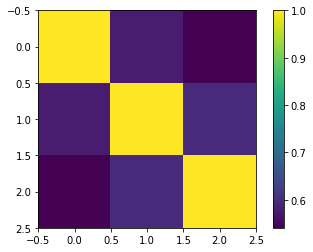

Class 1


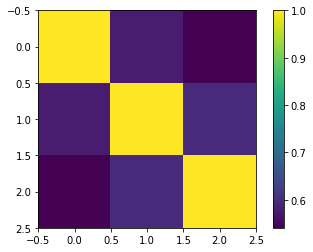

In [13]:
corr_dict = qrf.compute_tree_correlation()
for k,v in corr_dict.items():
    print("Class", k)
    plt.imshow(v)
    plt.colorbar()
    plt.show()